# GTZAN Music Clustering - Results and Visualizations

This notebook displays the results from clustering experiments.


In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

# Add src to path
sys.path.append('../src')

from config import Config

# Configure plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline


In [ ]:
import os
os.chdir('/')  # Set correct working directory

## Load Results


In [3]:
config = Config()

# Load metrics CSV
metrics_path = os.path.join(config.metrics_dir, 'metrics.csv')

if os.path.exists(metrics_path):
    metrics_df = pd.read_csv(metrics_path)
    print(f"Loaded {len(metrics_df)} experiment results")
    display(metrics_df)
else:
    print(f"Metrics not found: {metrics_path}")
    print("Run experiments first!")


Loaded 13 experiment results


,experiment_name,model,representation,clustering_algo,split,silhouette,calinski_harabasz,davies_bouldin,n_clusters,n_noise,ari,nmi,purity,latent_dim,multimodal
0,baseline_pca_kmeans,PCA+KMeans,mfcc_pca,kmeans,test,0.156768,39.898842,1.792552,10,0,0.295119,0.517580,0.501650,NaN,NaN
1,baseline_direct_kmeans,DirectKMeans,mfcc_raw,kmeans,test,0.156768,39.898827,1.792552,10,0,0.295119,0.517580,0.501650,NaN,NaN
2,baseline_ae_kmeans,AE+KMeans,ae_latent,kmeans,test,0.207538,60.264595,1.494875,10,0,0.271733,0.494107,0.488449,16.0,NaN
3,baseline_spectral,SpectralClustering,mfcc_raw,spectral,test,0.131255,36.220917,1.825900,10,0,0.312146,0.540354,0.574257,NaN,NaN
4,baseline_pca_kmeans,PCA+KMeans,mfcc_pca,kmeans,test,0.156768,39.898842,1.792552,10,0,0.295119,0.517580,0.501650,NaN,NaN
5,baseline_direct_kmeans,DirectKMeans,mfcc_raw,kmeans,test,0.156768,39.898827,1.792552,10,0,0.295119,0.517580,0.501650,NaN,NaN
6,baseline_ae_kmeans,AE+KMeans,ae_latent,kmeans,test,0.207538,60.264595,1.494875,10,0,0.271733,0.494107,0.488449,16.0,NaN
7,baseline_spectral,SpectralClustering,mfcc_raw,spectral,test,0.131255,36.220917,1.825900,10,0,0.312146,0.540354,0.574257,NaN,NaN
8,vae_mlp_kmeans,MLP-VAE,vae_latent,kmeans,test,0.258937,82.221642,1.357758,10,0,0.386340,0.583082,0.607261,16.0,NaN
9,vae_conv_kmeans,Conv-VAE,conv_vae_audio_lyrics,kmeans,test,0.014879,5.993558,2.205713,10,0,0.057482,0.183411,0.231023,16.0,True


## Compare Models


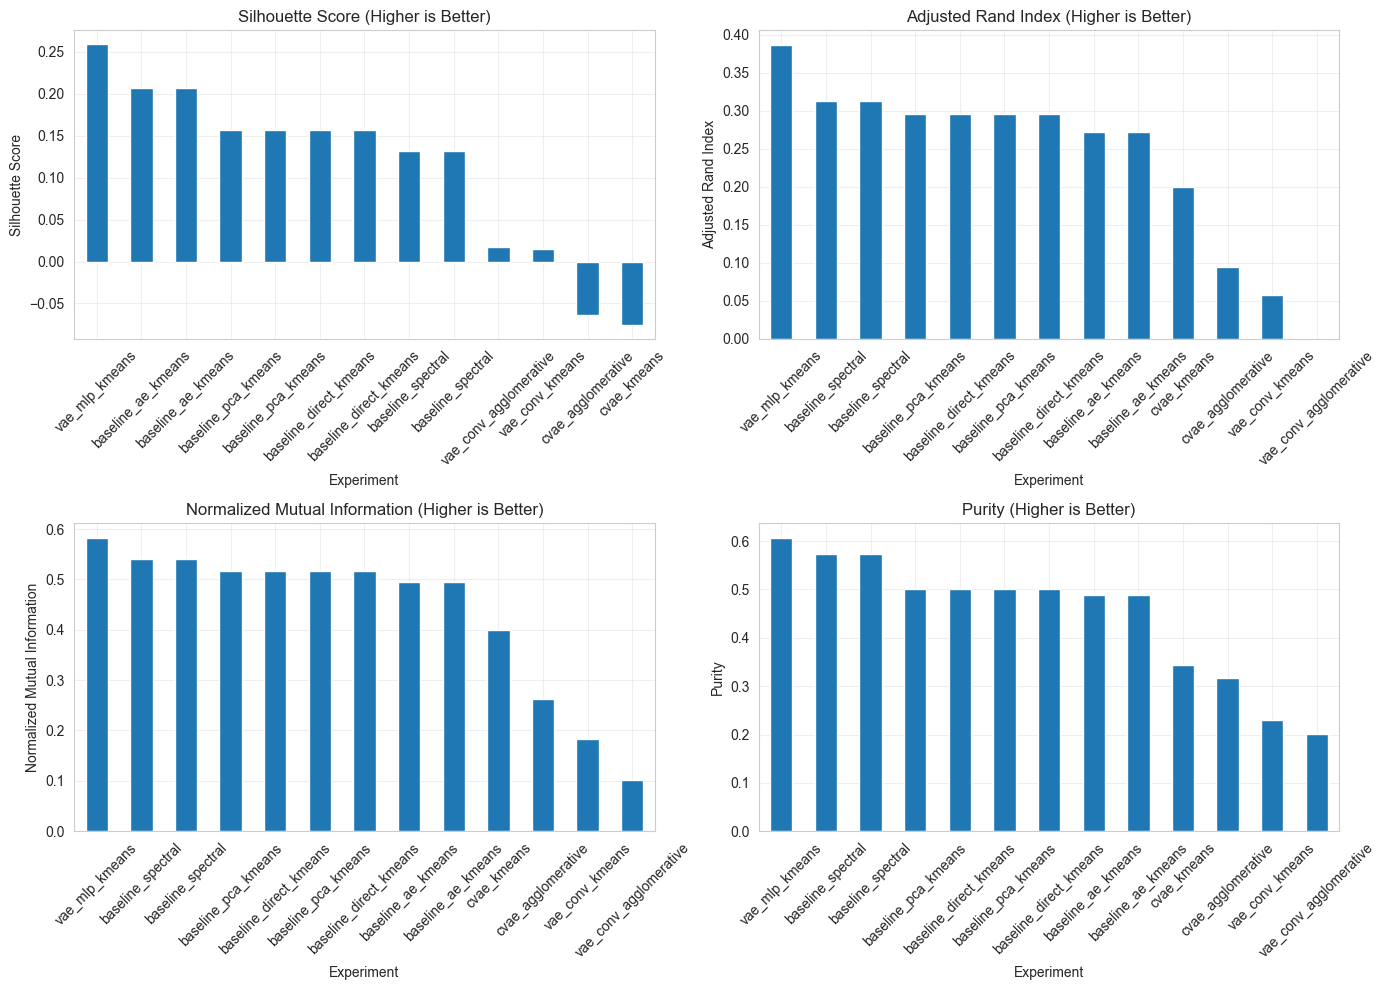


Best results by Silhouette Score:


,experiment_name,model,silhouette,ari,nmi
8,vae_mlp_kmeans,MLP-VAE,0.258937,0.386340,0.583082
2,baseline_ae_kmeans,AE+KMeans,0.207538,0.271733,0.494107
6,baseline_ae_kmeans,AE+KMeans,0.207538,0.271733,0.494107
0,baseline_pca_kmeans,PCA+KMeans,0.156768,0.295119,0.517580
4,baseline_pca_kmeans,PCA+KMeans,0.156768,0.295119,0.517580



Best results by ARI:


,experiment_name,model,silhouette,ari,nmi
8,vae_mlp_kmeans,MLP-VAE,0.258937,0.386340,0.583082
3,baseline_spectral,SpectralClustering,0.131255,0.312146,0.540354
7,baseline_spectral,SpectralClustering,0.131255,0.312146,0.540354
0,baseline_pca_kmeans,PCA+KMeans,0.156768,0.295119,0.517580
1,baseline_direct_kmeans,DirectKMeans,0.156768,0.295119,0.517580


In [4]:
if 'metrics_df' in locals():
    # Plot comparison of key metrics
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    metrics_to_plot = ['silhouette', 'ari', 'nmi', 'purity']
    titles = ['Silhouette Score', 'Adjusted Rand Index', 'Normalized Mutual Information', 'Purity']
    
    for i, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
        ax = axes[i // 2, i % 2]
        
        if metric in metrics_df.columns:
            data = metrics_df.sort_values(metric, ascending=False)
            data.plot(x='experiment_name', y=metric, kind='bar', ax=ax, legend=False)
            ax.set_title(f'{title} (Higher is Better)')
            ax.set_xlabel('Experiment')
            ax.set_ylabel(title)
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Show best results
    print("\nBest results by Silhouette Score:")
    best_silhouette = metrics_df.nlargest(5, 'silhouette')[['experiment_name', 'model', 'silhouette', 'ari', 'nmi']]
    display(best_silhouette)
    
    print("\nBest results by ARI:")
    best_ari = metrics_df.nlargest(5, 'ari')[['experiment_name', 'model', 'silhouette', 'ari', 'nmi']]
    display(best_ari)


## Visualizations

Display saved visualization plots from experiments.


Found 12 figures


### tsne_cvae.png


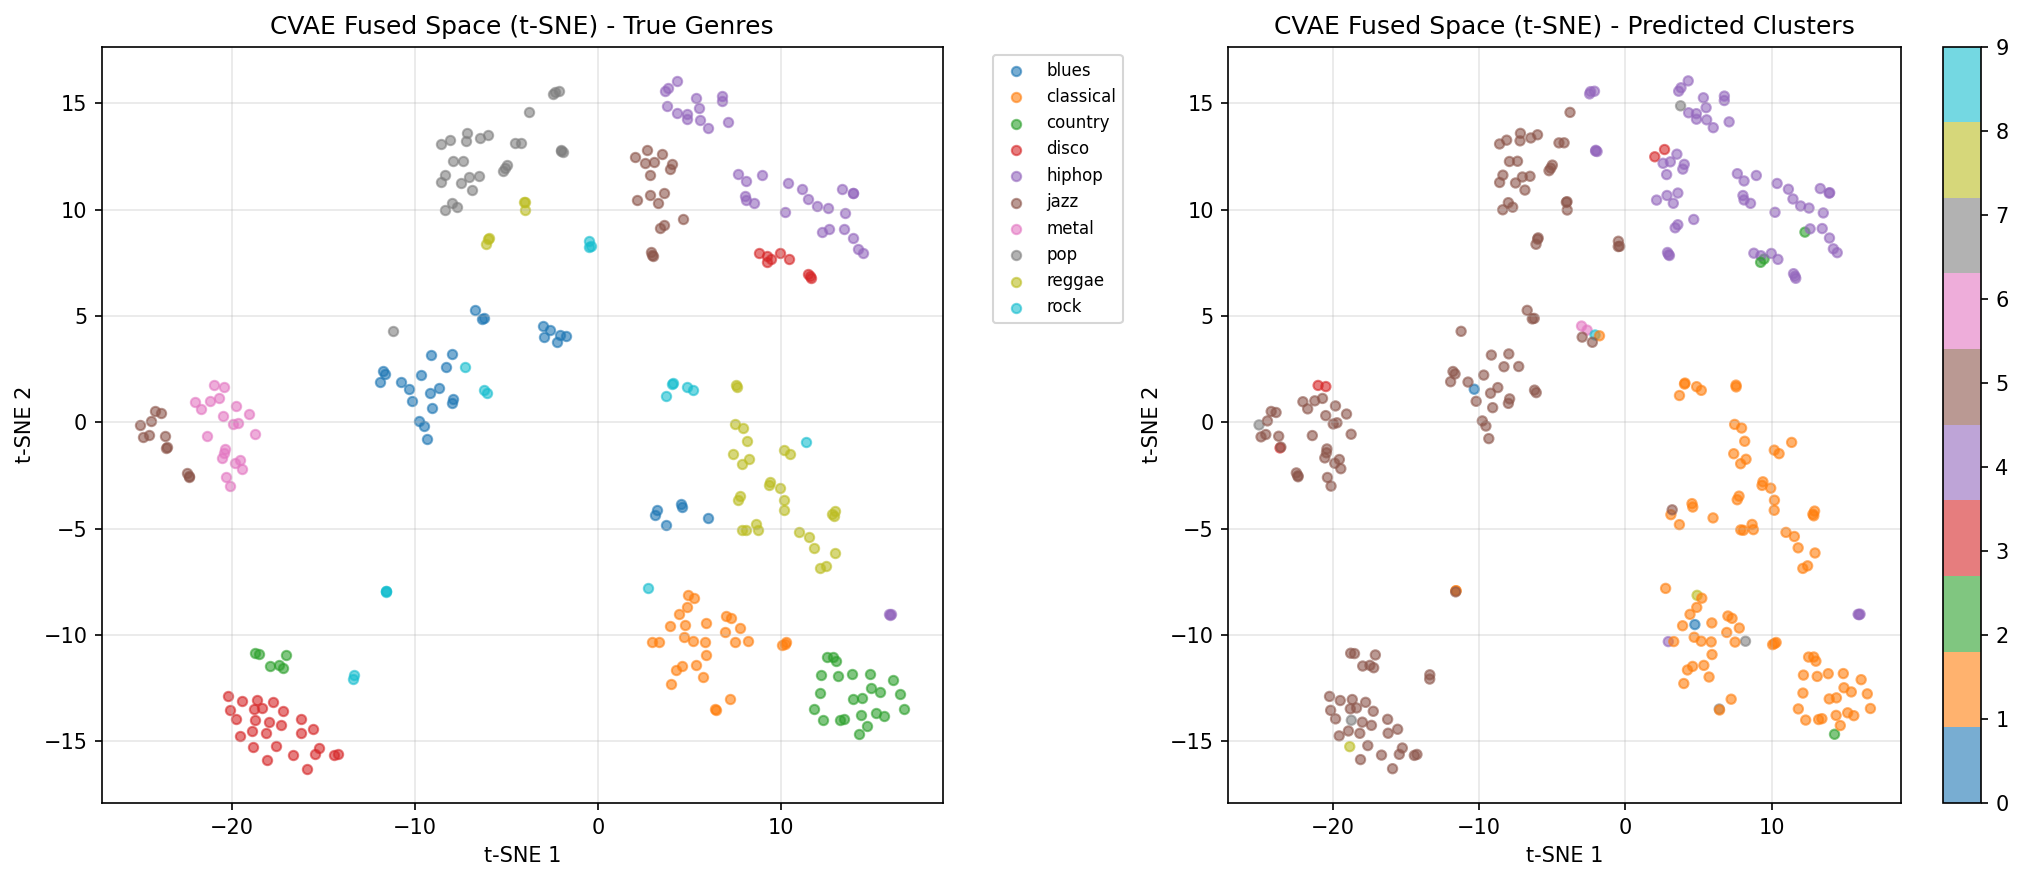


### tsne_vae_mlp.png


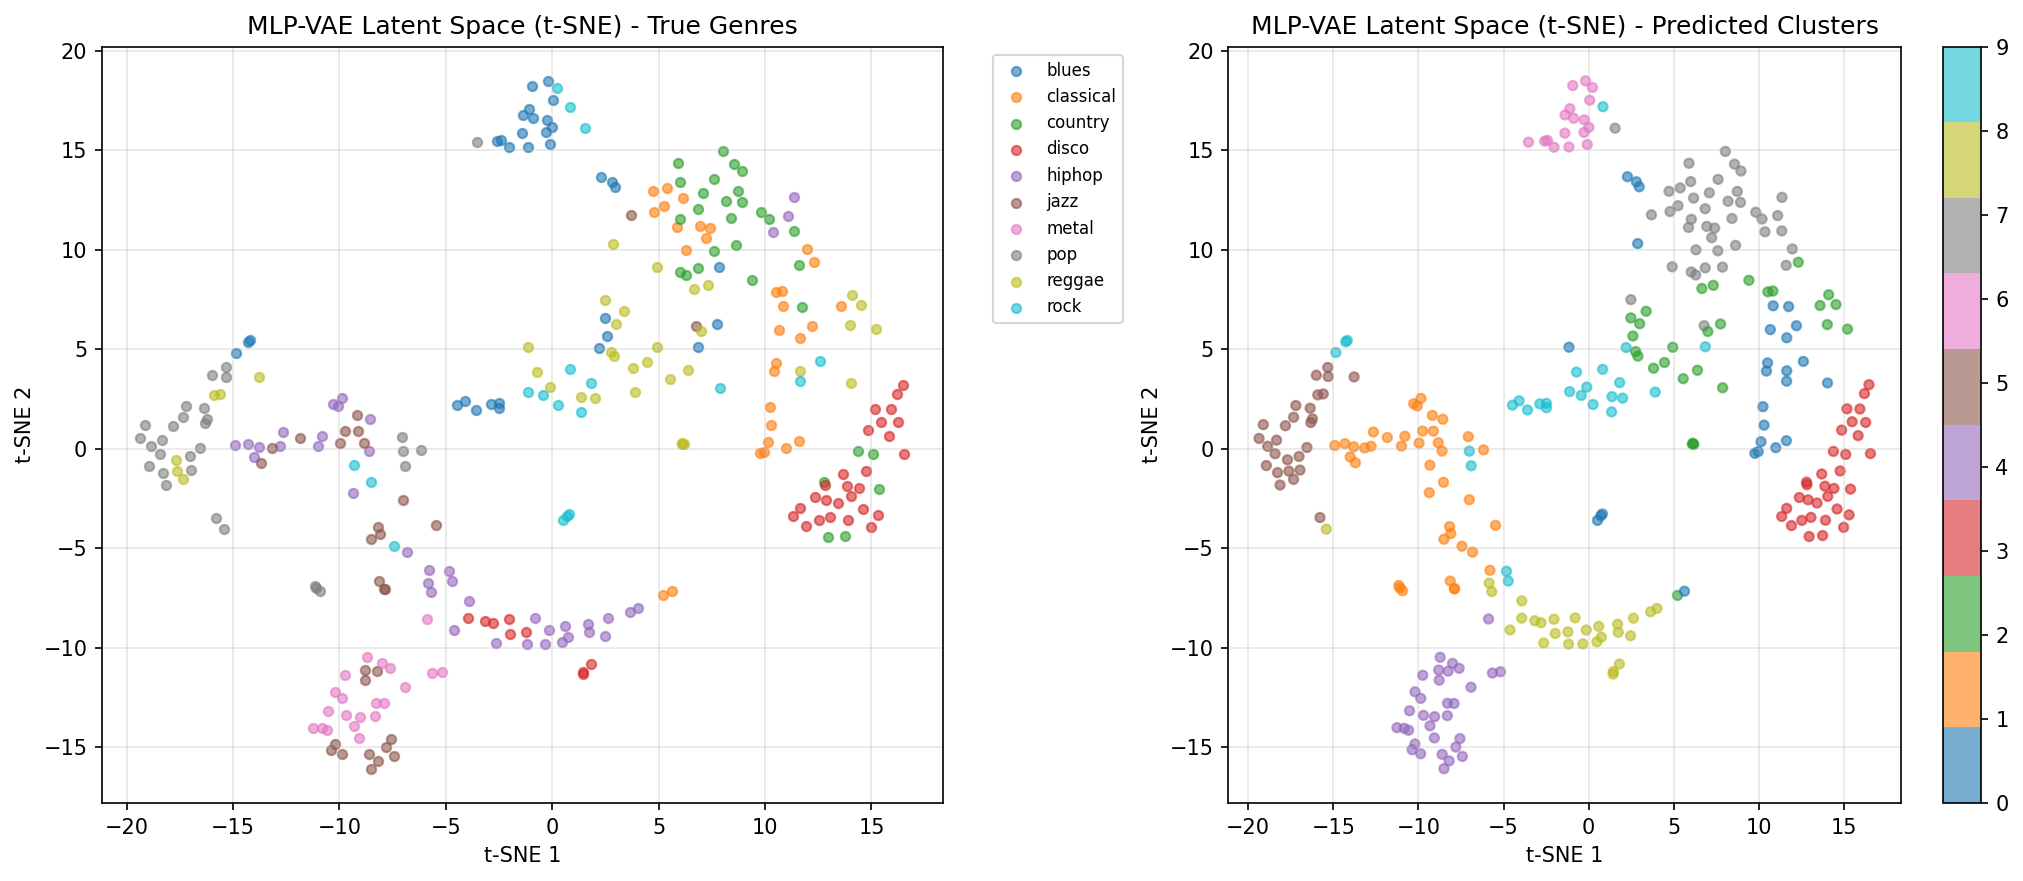


### tsne_vae_conv.png


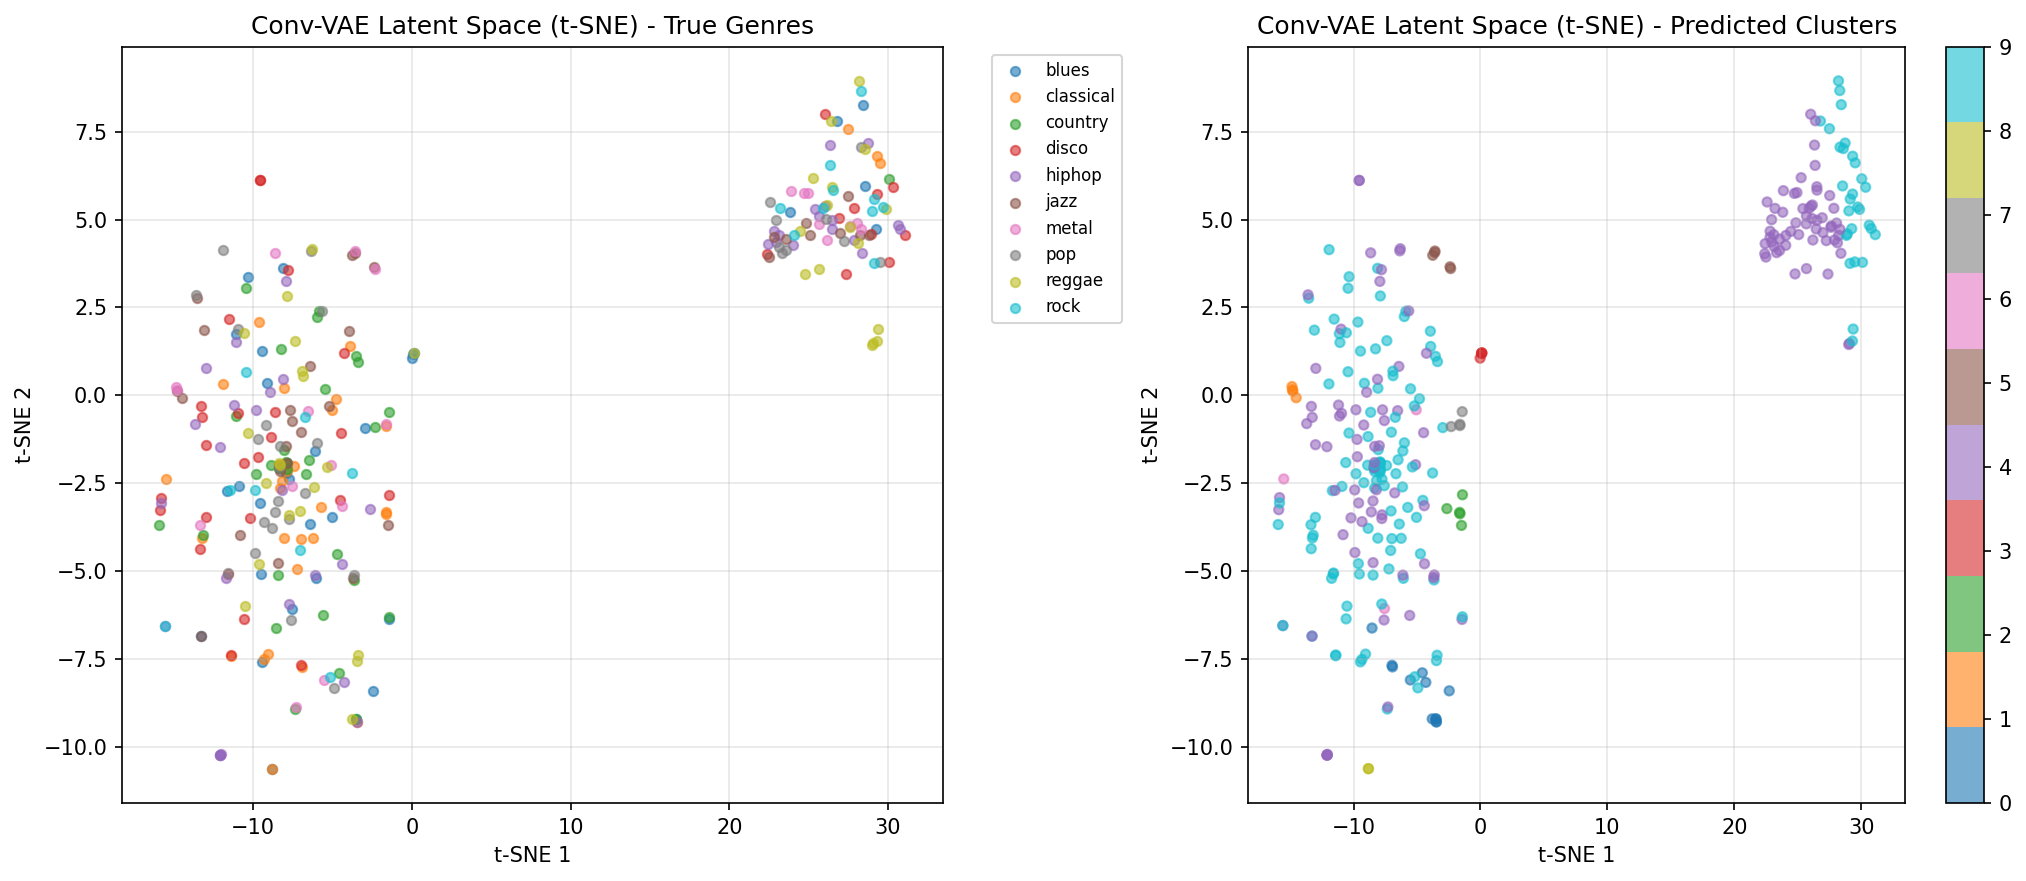


### tsne_ae_kmeans.png


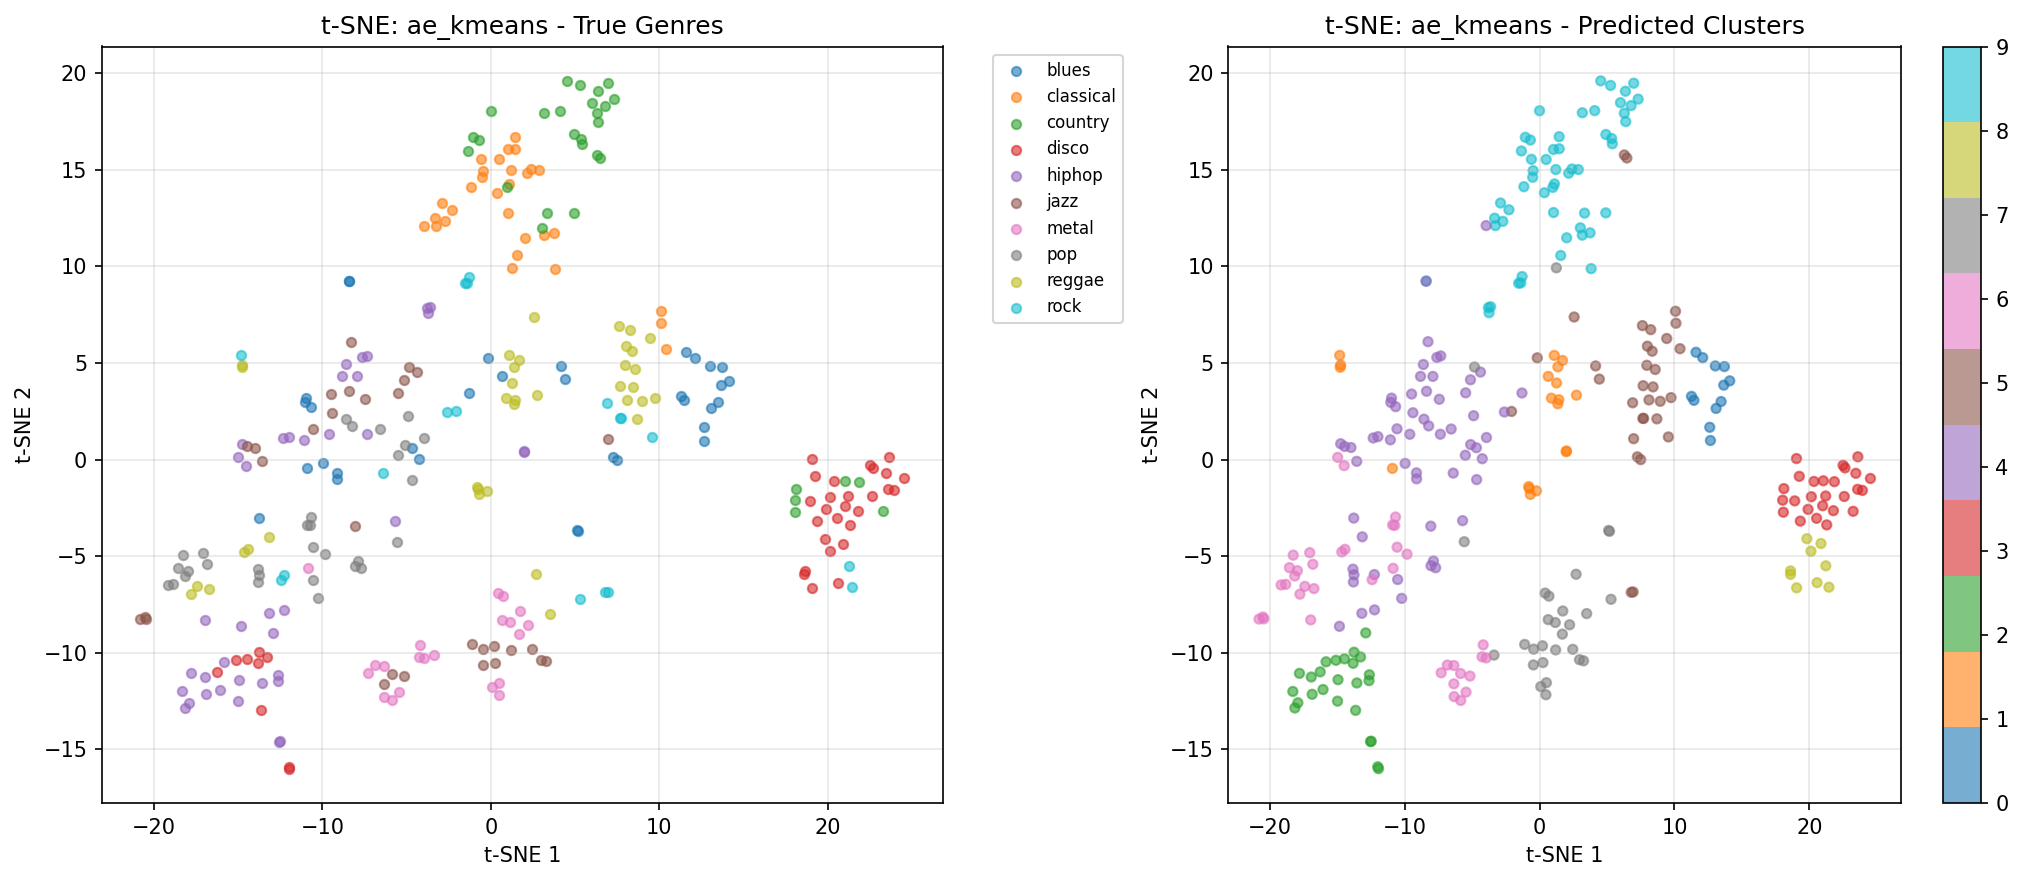


### tsne_spectral.png


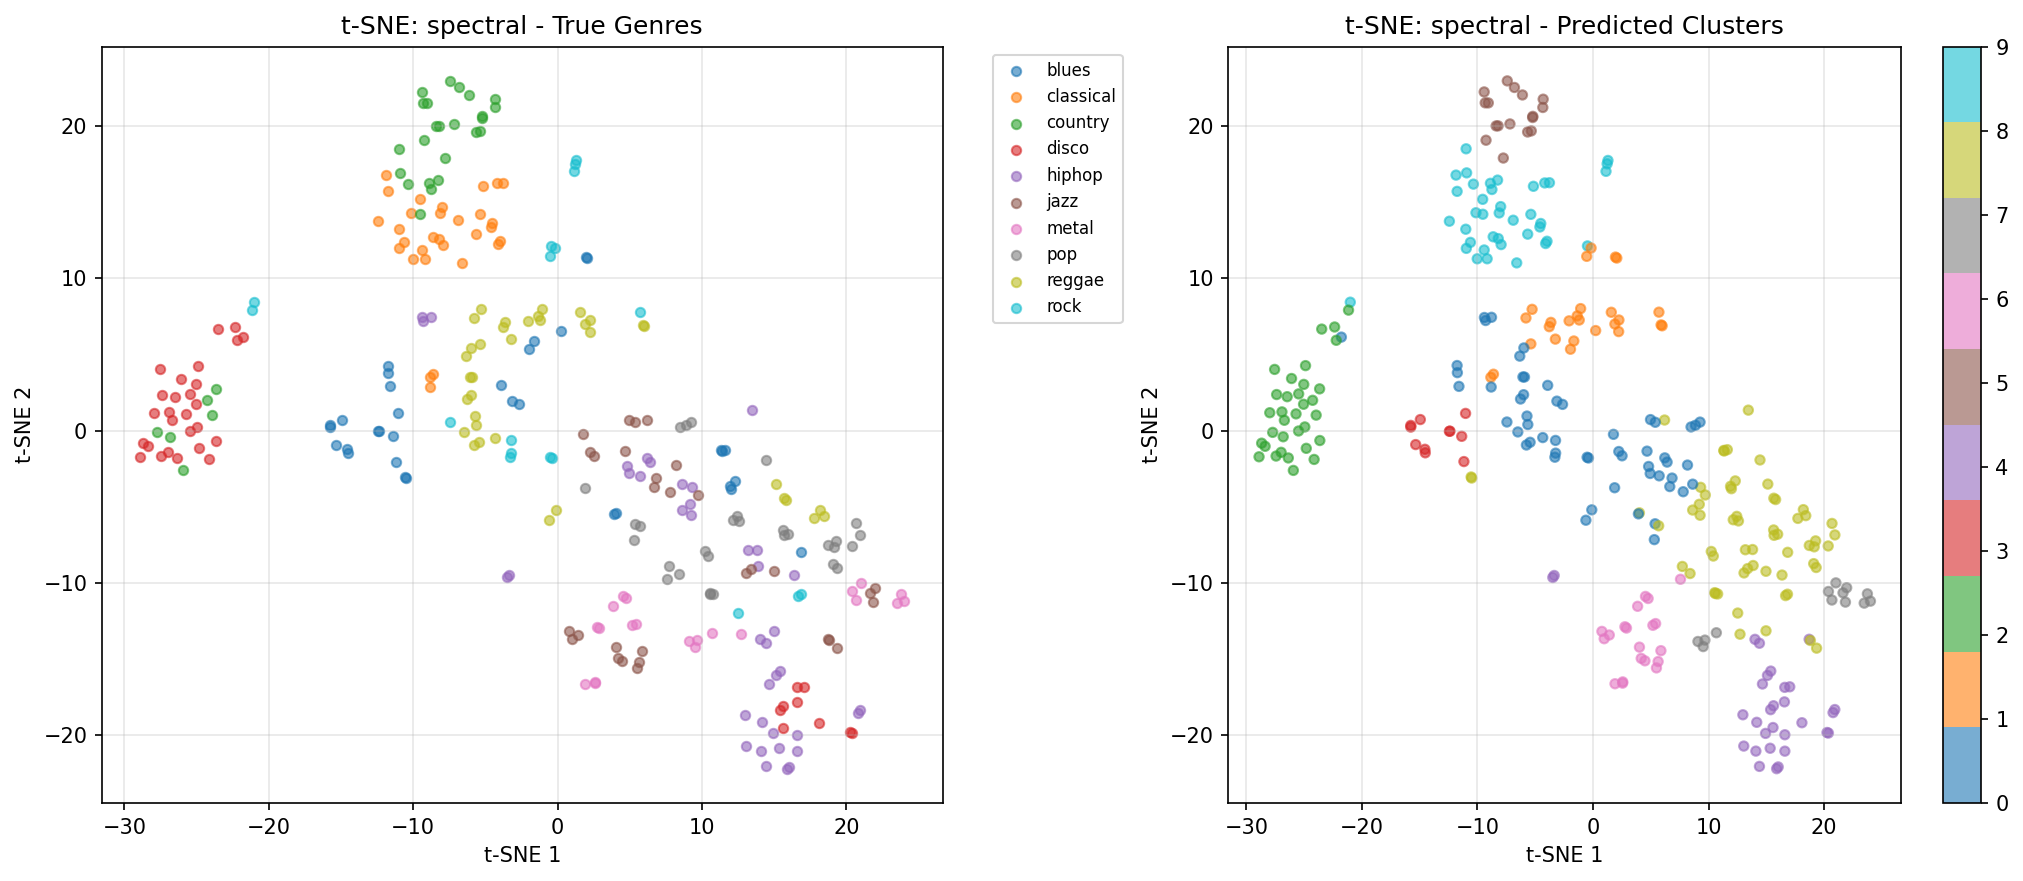


### tsne_direct_kmeans.png


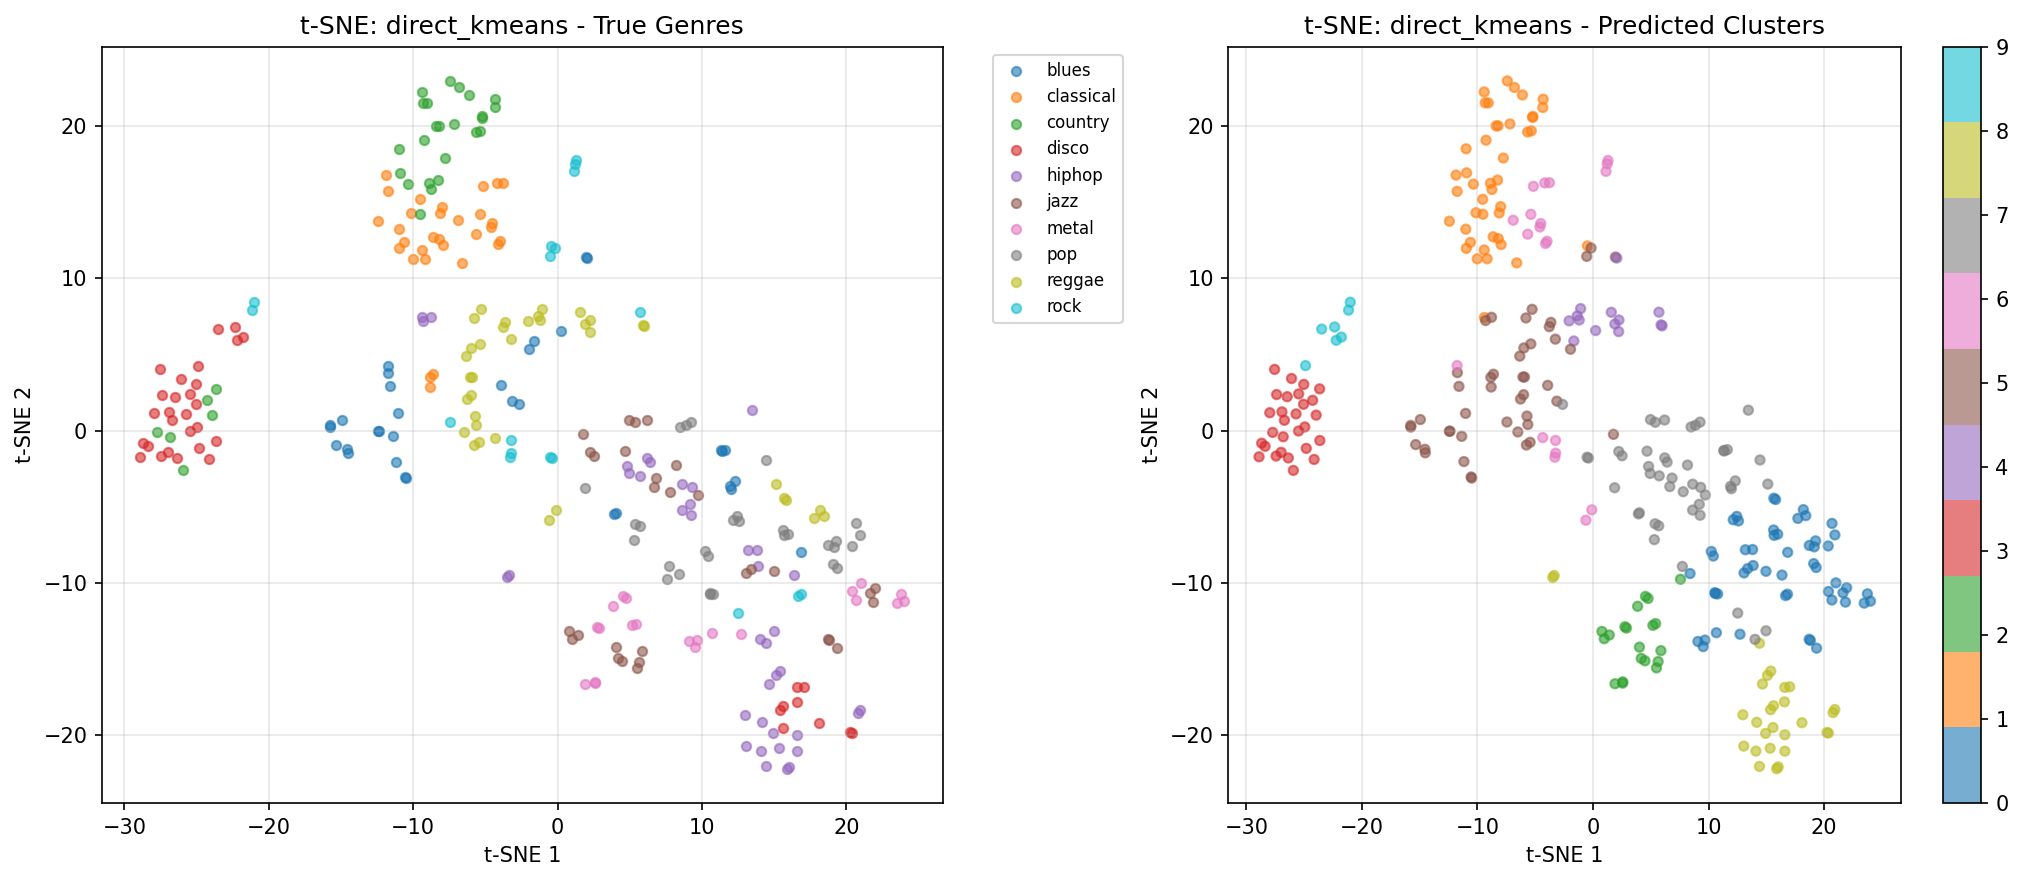


### tsne_pca_kmeans.png


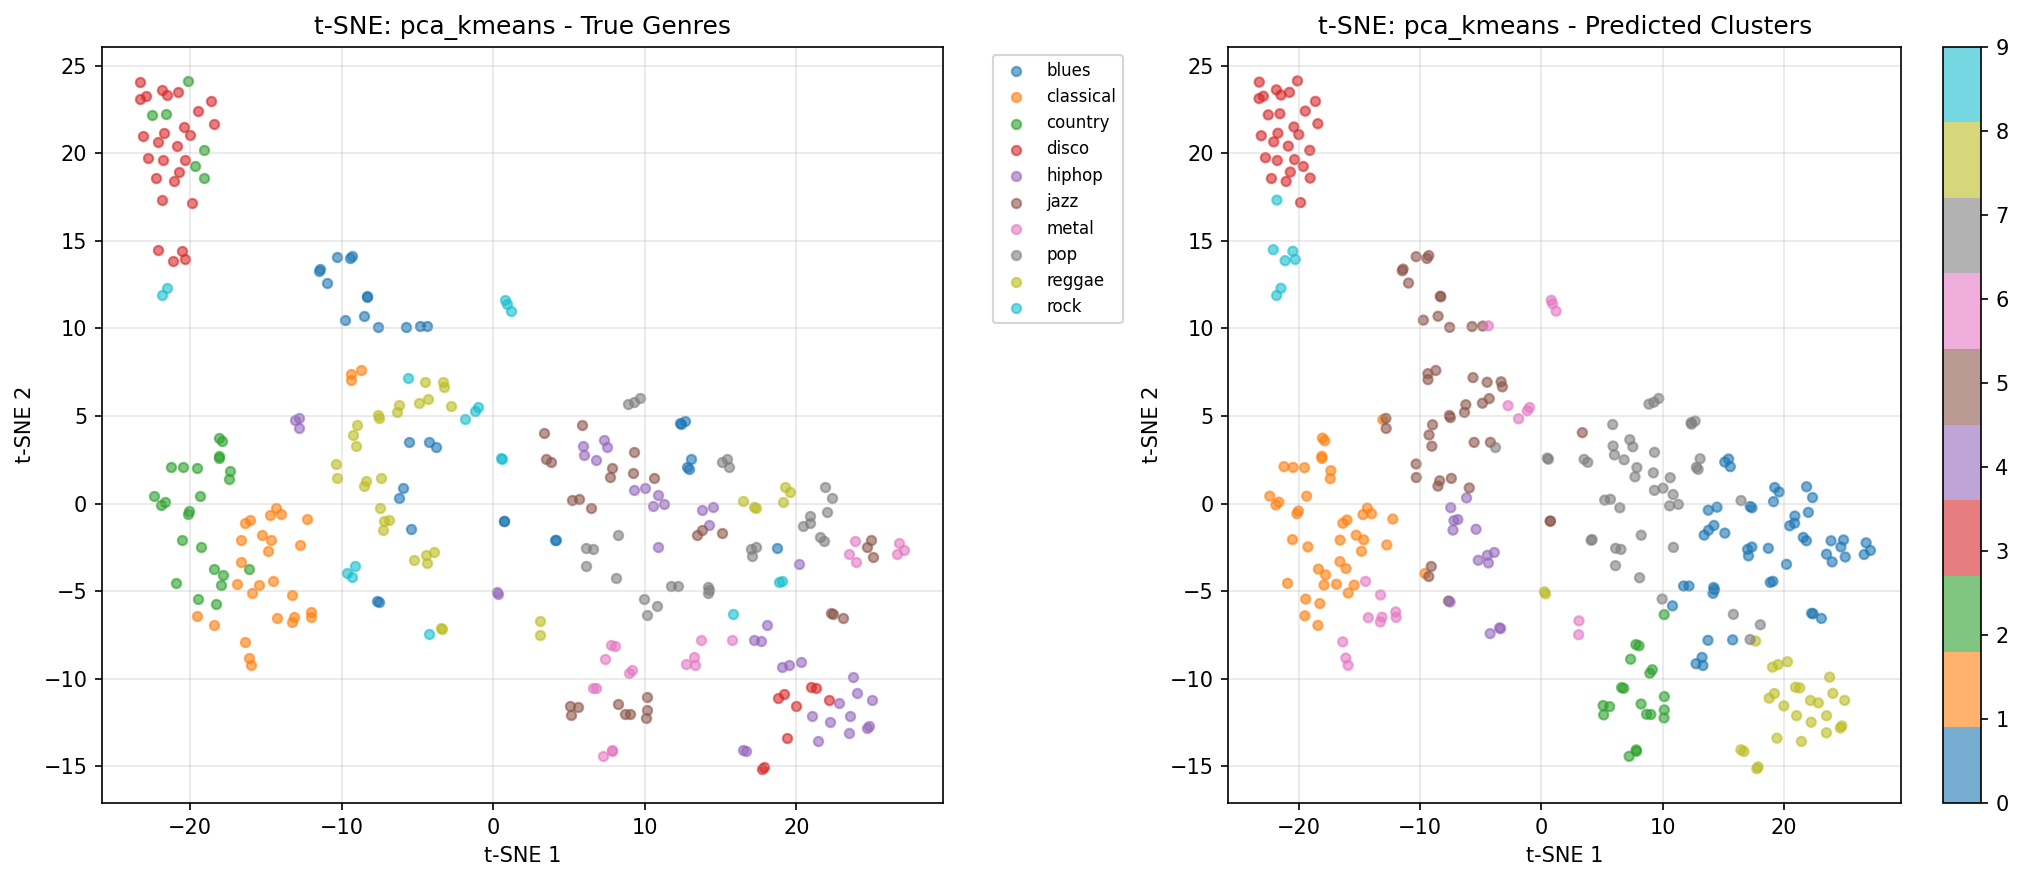

In [5]:
# Display saved plots
figures_dir = config.figures_dir

# List available figures
if os.path.exists(figures_dir):
    figures = [f for f in os.listdir(figures_dir) if f.endswith('.png')]
    print(f"Found {len(figures)} figures\n")
    
    # Display t-SNE plots
    tsne_plots = [f for f in figures if 'tsne' in f]
    for plot in tsne_plots:
        print(f"\n### {plot}")
        display(Image(filename=os.path.join(figures_dir, plot)))
else:
    print(f"Figures directory not found: {figures_dir}")
